# Dark Matter in M31  .. in 1970 (Rubin & Ford)

As a tribute to [Vera Rubin](https://en.wikipedia.org/wiki/Vera_Rubin)'s recent passing here is a notebook discussing one of her famous papers on the topic of dark matter.  During the Greenbank observing we covered rotation in our galaxy, and even in our galaxy how we could find out that there is dark matter in our galaxy the Milky Way. But now we will uncover that our nearest neighbor galaxy,the Andromeda Galaxy (a.k.a. **M31**), seems to have dark matter. 

Although [Fritz Zwicky](https://en.wikipedia.org/wiki/Fritz_Zwicky), in 1933, already had indications that things did not add up, and he coined the term *dunkle Materie* (Dark Matter, in German, he is from Swiss origin), it took another 20+ years before the astronomical community realized he was right.  Zwicky's work was based on the motions of galaxies in clusters, but it was the work of Roberts, Rubin, Bosma and many others that solidified that in galaxies themselves there was an equal problem of "missing matter", which we now call Dark Matter.

In this notebook we will take the original data from Rubin & Ford's 1970 [paper](http://adsabs.harvard.edu/abs/1970ApJ...159..379R) and derive a rotation curve.  Let us start with the basic data in this paper:
  
![table](m31-table1.png)

This table has 9 columns, but columns 2, 3, 6 and possibly 7, are the only that are the actual columns relevant for us now. Columns 4, 5 and 8 are actually derived from the other columns, but we want to show the computations to get to these columns in this notebook.

It takes some reading of the paper (p381) to realize X "*is positive with increased Right Ascension*", and Y "*is positive to the south*".

In [1]:
# 
data_file = './m31-rubin.tab'

read this data (x,y,vobs,weight)
and plot just the (x,y) positions on the sky. Units are arcmin and km/s. Recall the diameter of the moon is about 30 arcmin.  M31 is large!


In [2]:
import numpy as np
#                                          read in rows, but transpose the data to get us the columns we want
(x,y,vobs,wt) = np.loadtxt(data_file).T 
print(len(x))

67


In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

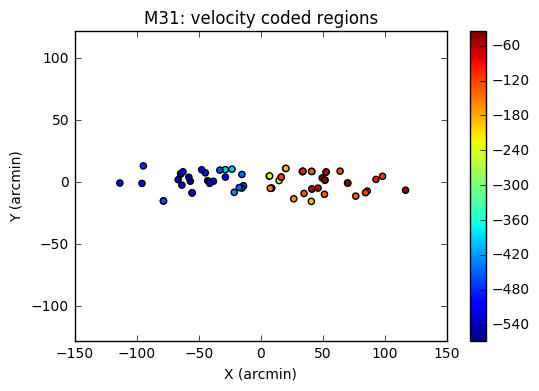

In [4]:
plt.scatter(x,y,c=vobs)
plt.axis('equal')
plt.xlabel('X (arcmin)')
plt.ylabel('Y (arcmin)')
plt.title('M31: velocity coded regions')
plt.colorbar()

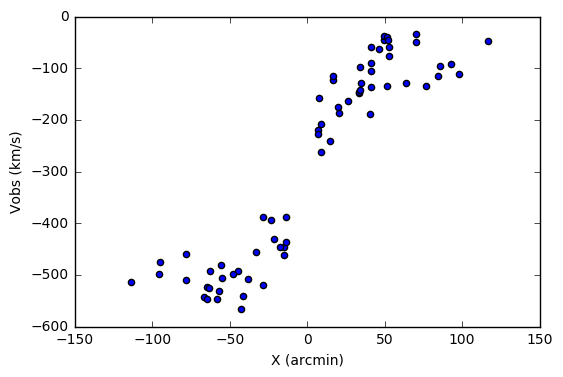

In [5]:
plt.scatter(x,vobs)
plt.xlabel('X (arcmin)')
plt.ylabel('Vobs (km/s)');

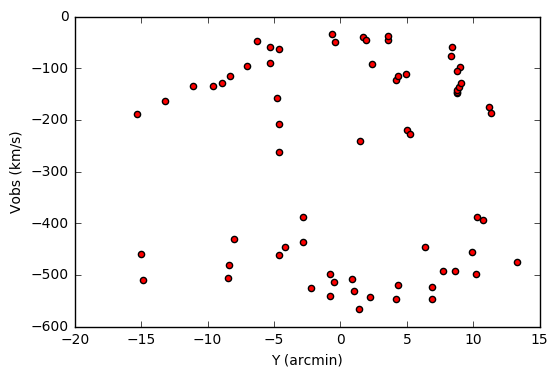

In [6]:
plt.scatter(y,vobs,c='r')
plt.xlabel('Y (arcmin)')
plt.ylabel('Vobs (km/s)');

The figure has X along the major axis, and Y along the minor axis, but these are rotated along the sky,because the position angle of the galaxy is not 90 degrees.


![regions](m31-chart.png)

In [7]:
pa = 32.0           # 0 means north up, positive is counting east (counter clock wise)
inc = 77.0          # 90 is edge on, 0 is face on
vsys = -300.0         # systemic velocity in km/s
distance = 690.0    # distance in kpc

Now produce the same plot rotated how it should look on the sky and compare with the figure we took from the published paper.

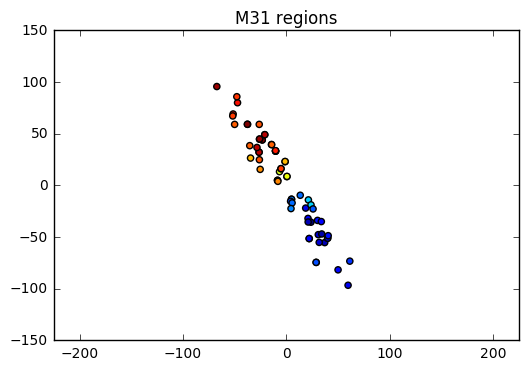

In [8]:
# useful constants for a rotation matrix
cosp = np.cos(pa * np.pi/180.0)
sinp = np.sin(pa * np.pi/180.0)
# rotate all the (x,y) coordinates
x_sky = -sinp * x + cosp * y
y_sky =  cosp * x + sinp * y
# plot
plt.scatter(x_sky,y_sky,c=vobs)
plt.axis('equal')
plt.title('M31 regions');

Now produce the rotation speed, assuming all measurements are from the same plane and are on circular orbits, as function of a deprojected X. This would be rotation curve on both the negative and positive X' axis.

$$
    V_{obs} = V_{sys} + V_{rot} * \sin{i} * \cos{\Theta}
$$
where
$$
    \tan{\Theta} = {\tan{\phi} \over \cos{i}}
$$
with $\Theta$ is in the plane of the galaxy, and $\phi$ in the plane of the sky.


In [9]:
# useful de-projection factors
cosi = np.cos(inc*np.pi/180.0)
sini = np.sin(inc*np.pi/180.0)
# (x,y) are along sky major and minor axis
# (xs,ys) are in the disk of M31
xs = x
ys = y/cosi
tan_t = ys/xs
t = np.arctan2(ys,xs)*180.0/np.pi
cos_t = 1.0/np.sqrt(1+tan_t*tan_t)
vrots = (vobs-vsys) / cos_t / sini
rs = np.sqrt(xs*xs + ys*ys) * np.sign(xs)
#

In [10]:
k=0
print("Checking table1 for region %d: " % (k+1))
print(x[k],y[k],rs[k],t[k])

Checking table1 for region 1: 
14.8 1.5 16.2327997373 24.2538725979


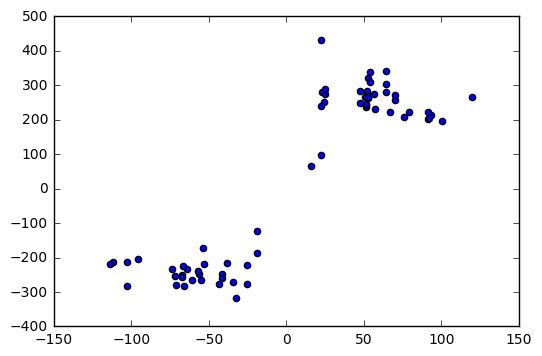

In [11]:
plt.scatter(rs,vrots);

Fold it over, and plot a single rotation curve as function of radius. Convert the radius to kpc from the original arcmin based on the distance.

In [12]:
vrot = np.abs(vrots)
r = np.abs(rs)

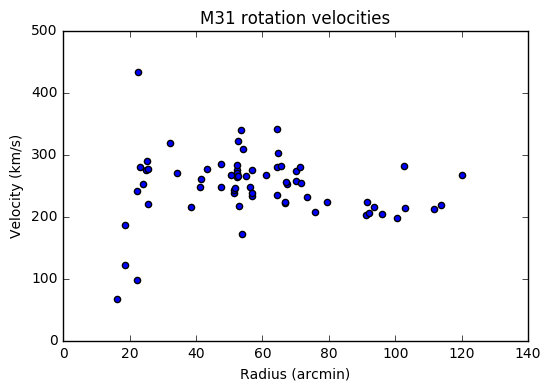

In [13]:
plt.scatter(r,vrot)
plt.title("M31 rotation velocities")
plt.xlabel("Radius (arcmin)")
plt.ylabel("Velocity (km/s)");